In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from rainman2 import RAINMAN2

Rainman2's logging has been configured!


Using TensorFlow backend.



#### Normal case: Start with 30% Random actions (explore) and rest 70% fetch max actions (exploit)


In [3]:
# Server profile: num_ues=200, APs=16, Scale=200.0, explore_radius=1
from collections import OrderedDict
ALGORITHM_CONFIG = OrderedDict(
    EPISODES=400,
    ALPHA=0.2,
    GAMMA=0.9,
    EPSILON=0.3,
    EPSILON_DECAY=0.99,
    EPSILON_MIN=0.01,
    VERBOSE=True,
    L1_HIDDEN_UNITS=13,
    L2_HIDDEN_UNITS=13,
    L1_ACTIVATION='relu',
    L2_ACTIVATION='relu',
    LOSS_FUNCTION='mean_squared_error',
    OPTIMIZER='Adam',
)

CELLULAR_MODEL_CONFIG = OrderedDict(
    NAME='Cellular',
    TYPE='Dev',
    SERVER='0.0.0.0',
    SERVER_PORT='8000',
    VERBOSE=True,
)


In [4]:
RAINMAN2.algorithm_config = ALGORITHM_CONFIG
RAINMAN2.environment_config = CELLULAR_MODEL_CONFIG

In [5]:
result = RAINMAN2.run_experiment("Cellular", "Qlearning", "Naive")

2018-04-18 18:45:47,548 Aris-MacBook-Pro.local Rainman2[48512] INFO Starting experiment!
2018-04-18 18:45:47,549 Aris-MacBook-Pro.local Rainman2[48512] INFO Building Environment instance: Cellular
2018-04-18 18:45:47,550 Aris-MacBook-Pro.local rainman2.lib.environment.cellular.base[48512] INFO Instantiating Cellular client: Dev
2018-04-18 18:45:47,552 Aris-MacBook-Pro.local QCellularAgent[48512] INFO Configuration used for the QCellular Agent:
2018-04-18 18:45:47,553 Aris-MacBook-Pro.local QCellularAgent[48512] INFO episodes: 400
2018-04-18 18:45:47,553 Aris-MacBook-Pro.local QCellularAgent[48512] INFO alpha: 0.2
2018-04-18 18:45:47,554 Aris-MacBook-Pro.local QCellularAgent[48512] INFO gamma: 0.9
2018-04-18 18:45:47,555 Aris-MacBook-Pro.local QCellularAgent[48512] INFO epsilon: 0.3
2018-04-18 18:45:47,556 Aris-MacBook-Pro.local QCellularAgent[48512] INFO epsilon_decay: 0.99
2018-04-18 18:45:47,557 Aris-MacBook-Pro.local QCellularAgent[48512] INFO epsilon_min: 0.01
2018-04-18 18:45:47,5

Module: run_experiment took: 204.62228100000002s


[========================================================================] 100%


In [6]:
print("Number of states encountered: {}".format(len(result.Q)))

Number of states encountered: 3516


In [7]:
print("Number of q_ap_states encountered: {}".format(len(result.Q_ap)))

Number of q_ap_states encountered: 989


In [ ]:
print(result.Q)

In [ ]:
print(result.Q_ap)

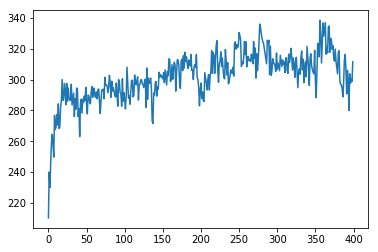

In [11]:
plt.plot(result.Rewards);

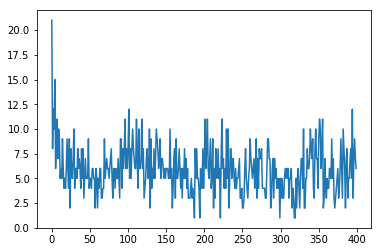

In [12]:
plt.plot(result.Handoffs);

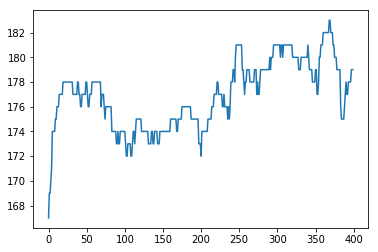

In [13]:
plt.plot(result.Meets_SLA);